In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('datasets\Cellphone.csv')
df

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [4]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [99]:
df.shape

(161, 14)

In [100]:
df.drop('Product_id',axis=1,inplace=True)

In [101]:
df

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [102]:
df.isnull().sum()

Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [103]:
df.duplicated().sum()

0

<Axes: >

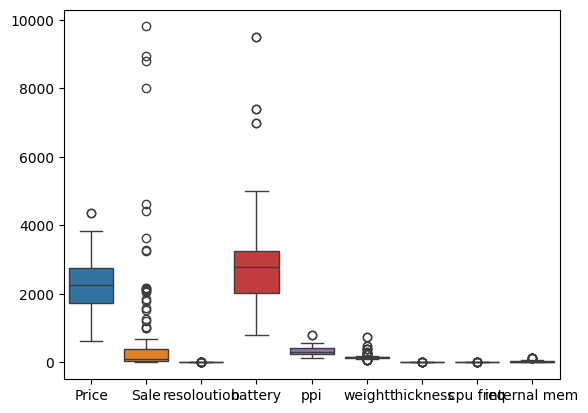

In [104]:
cols=['Price','Sale','resoloution','battery','ppi','weight','thickness','cpu freq','internal mem']
sns.boxplot(df[cols])

In [105]:
cols=['Price','Sale','resoloution','battery','ppi','weight','thickness','cpu freq','internal mem']


for col in cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)

    IQR=Q3-Q1
    lowwer_fence=Q1-1.5*IQR
    upper_fence=Q3+1.5*IQR

    df[col]=np.where(((pd.Series(df[col]))>=upper_fence) | ((pd.Series(df[col]))<=lowwer_fence), df[col].median(),df[col])

In [106]:
x=df.drop('Price',axis=1)
y=df['Price']

In [107]:
x

,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,10.0,135.0,5.20,424.0,8,1.350,16.0,3.000,13.00,8.0,2610.0,7.4
1,10.0,125.0,4.00,233.0,2,1.300,4.0,1.000,3.15,0.0,1700.0,9.9
2,10.0,110.0,4.70,312.0,4,1.200,8.0,1.500,13.00,5.0,2000.0,7.6
3,11.0,118.5,4.00,233.0,2,1.300,4.0,0.512,3.15,0.0,1400.0,11.0
4,11.0,125.0,4.00,233.0,2,1.300,4.0,1.000,3.15,0.0,1700.0,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
156,106.0,178.0,5.46,538.0,4,1.875,16.0,6.000,12.00,16.0,4080.0,8.4
157,106.0,170.0,5.50,534.0,4,1.975,16.0,6.000,20.00,8.0,3400.0,7.9
158,106.0,150.0,5.50,401.0,8,2.200,64.0,4.000,20.00,20.0,3000.0,6.8
159,106.0,170.0,5.50,534.0,4,1.975,16.0,6.000,20.00,8.0,3400.0,7.9


In [108]:
y

0      2357.0
1      1749.0
2      1916.0
3      1315.0
4      1749.0
        ...  
156    3551.0
157    3211.0
158    3260.0
159    3211.0
160    2536.0
Name: Price, Length: 161, dtype: float64

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [110]:
x_train.shape,x_test.shape

((112, 12), (49, 12))

In [111]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [112]:
#AdaBoosting Regressor
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)


AdaBoostRegressor()

In [113]:
y_pred=abr.predict(x_test)
y_pred

array([2920.38461538, 3024.51851852,  784.42857143, 1606.        ,
       3007.63157895, 1796.69230769, 3024.51851852, 2505.32      ,
       1986.14285714, 2327.3       , 2418.89473684, 1496.8125    ,
       1800.        , 1464.6       , 2301.71428571, 2305.90909091,
       1800.        ,  784.42857143, 1606.        , 3205.76315789,
       1578.9       , 1935.        , 2573.31428571, 2063.5       ,
       1788.125     , 2011.28571429, 2305.22222222,  705.        ,
       1800.        , 2237.04166667, 2902.5       , 3429.06666667,
       2300.79166667, 1788.125     , 2300.79166667, 1578.9       ,
       2622.16666667, 1464.16666667, 1464.6       , 2428.27777778,
       1677.2962963 , 2505.32      , 1587.09090909, 2848.45      ,
       2874.6969697 , 2743.675     , 3007.63157895, 2080.4       ,
       2249.77777778])

In [114]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test,y_pred)

0.9533609013776584

In [115]:
mean_absolute_error(y_test,y_pred)

121.50612285902025

In [116]:
mean_squared_error(y_test,y_pred)

23139.12336493091

In [117]:
# Hyperparametre tuning for adaboosting 
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[50,100,200,250],'learning_rate':[0.01,0.1,0.5],'loss':['linear','square','exponential']}
grid_search=GridSearchCV(estimator=abr,param_grid=param_grid,cv=5,verbose=3)

In [118]:
grid_search

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 200, 250]},
             verbose=3)

In [119]:
grid_search.fit(x_train,y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=0.01, loss=linear, n_estimators=50;, score=0.835 total time=   0.1s
[CV 2/5] END learning_rate=0.01, loss=linear, n_estimators=50;, score=0.855 total time=   0.0s
[CV 3/5] END learning_rate=0.01, loss=linear, n_estimators=50;, score=0.881 total time=   0.0s
[CV 4/5] END learning_rate=0.01, loss=linear, n_estimators=50;, score=0.864 total time=   0.0s
[CV 5/5] END learning_rate=0.01, loss=linear, n_estimators=50;, score=0.899 total time=   0.0s
[CV 1/5] END learning_rate=0.01, loss=linear, n_estimators=100;, score=0.813 total time=   0.2s
[CV 2/5] END learning_rate=0.01, loss=linear, n_estimators=100;, score=0.849 total time=   0.2s
[CV 3/5] END learning_rate=0.01, loss=linear, n_estimators=100;, score=0.868 total time=   0.2s
[CV 4/5] END learning_rate=0.01, loss=linear, n_estimators=100;, score=0.859 total time=   0.2s
[CV 5/5] END learning_rate=0.01, loss=linear, n_estimators=100;, score=0.884 to

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 200, 250]},
             verbose=3)

In [120]:
grid_search.best_params_

{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 250}

In [121]:
grid_search.best_score_

0.9236106511971933

In [122]:
best_model=grid_search.best_estimator_
best_model

AdaBoostRegressor(learning_rate=0.5, loss='exponential', n_estimators=250)

In [123]:
y_pred_tuned=best_model.predict(x_test)
y_pred_tuned

array([2927.31578947, 3058.27272727,  791.        , 1624.36363636,
       3011.02      , 1813.05      , 3041.93333333, 2526.18181818,
       1972.        , 2406.75      , 2485.        , 1552.61538462,
       1876.88235294, 1446.28571429, 2290.45454545, 2365.15789474,
       1833.125     ,  791.        , 1624.36363636, 3245.02857143,
       1598.06666667, 1882.        , 2512.63888889, 2097.81818182,
       1714.69230769, 2008.5       , 2250.92857143,  736.66666667,
       1876.88235294, 2160.67857143, 2840.14285714, 3447.25      ,
       2197.75      , 1714.69230769, 2342.53333333, 1615.1       ,
       2629.22222222, 1508.83333333, 1481.21428571, 2513.96428571,
       1662.38888889, 2526.18181818, 1628.125     , 2925.07843137,
       2943.91891892, 2732.3       , 3025.6744186 , 2035.16666667,
       2172.5       ])

In [124]:
r2_score(y_test,y_pred_tuned)


0.9609761314060381

In [125]:
#Gradient Boosting  Regressoion 
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
y_pred

array([2891.19409298, 3289.00671823,  747.07728216, 1585.08059111,
       3180.58124483, 1966.17804336, 3259.38001755, 2765.36102951,
       1912.44753192, 2531.05333595, 2688.12278958, 1571.05343333,
       1619.79948964, 1244.83211269, 2385.8513975 , 2324.16725687,
       1782.21143682,  719.93752649, 1585.08059111, 3220.09001764,
       1515.32525569, 1806.39635115, 2451.33574189, 2026.89253983,
       2011.99601343, 1931.84348759, 2123.65976341,  655.19447875,
       1619.79948964, 2216.49260572, 2969.98772651, 3620.73093395,
       2094.91157317, 2011.99601343, 2319.86172376, 1766.35258734,
       2519.10460265, 1427.00356161, 1315.58446082, 2518.2394338 ,
       1621.83461624, 2765.36102951, 1711.33274017, 3059.66693706,
       2931.39500058, 2770.69973378, 3052.23604265, 1930.442344  ,
       2064.51200937])

In [126]:
r2_score(y_test,y_pred)

0.982539842948485

In [127]:
# Hyperparametre tuning for gradien bossting
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[50,100,200],'learning_rate':[0.01,0.1,0.5]}
grid_search=GridSearchCV(estimator=gbr,param_grid=param_grid,cv=5,verbose=3)
grid_search.fit(x_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=0.507 total time=   0.0s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.504 total time=   0.0s
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=0.483 total time=   0.0s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=0.575 total time=   0.0s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.551 total time=   0.0s
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.706 total time=   0.0s
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=0.710 total time=   0.0s
[CV 3/5] END learning_rate=0.01, n_estimators=100;, score=0.737 total time=   0.0s
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=0.781 total time=   0.0s
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=0.781 total time=   0.0s
[CV 1/5] END learning_rate=0.01, n_estimators=200;, score=0.841 total time=   0.1s
[CV 2/5] END learning_rate=0.01,

{'learning_rate': 0.1, 'n_estimators': 100}

In [128]:
best_model=grid_search.best_estimator_
best_model


GradientBoostingRegressor()

In [129]:
y_pred_tuned=best_model.predict(x_test)
y_pred_tuned

array([2891.19409298, 3284.16235667,  747.07728216, 1585.08059111,
       3178.32455611, 1966.17804336, 3259.38001755, 2730.39124288,
       1912.44753192, 2531.05333595, 2688.12278958, 1571.05343333,
       1619.79948964, 1244.83211269, 2385.8513975 , 2324.16725687,
       1782.21143682,  719.93752649, 1585.08059111, 3220.09001764,
       1515.32525569, 1773.51639901, 2451.33574189, 2026.89253983,
       2011.99601343, 1931.84348759, 2123.65976341,  655.19447875,
       1619.79948964, 2216.49260572, 2969.98772651, 3620.73093395,
       2094.91157317, 2011.99601343, 2319.86172376, 1766.35258734,
       2519.10460265, 1427.00356161, 1315.58446082, 2518.2394338 ,
       1621.83461624, 2730.39124288, 1711.33274017, 3059.66693706,
       2931.39500058, 2770.69973378, 3052.23604265, 1930.442344  ,
       2064.51200937])

In [130]:
r2_score(y_test,y_pred_tuned)

0.9826203977454286